# Tempo di fuga del moto Browniano
Lo scopo di questo laboratorio è studiare il tempo di uscita di un moto Browniano da alcuni intorni dell'origine.

Se state eseguendo questo notebook dal Binder tenete sempre da conto l'efficienza delle variabili che state utilizzando.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive

rng = np.random.default_rng(seed=12346)

## Esercizio 1: moto Browniano sulla retta
**Obiettivo:** studiare il tempio medio di uscita di un moto Browniano da un intorno $[-r,r]$ dell'origine.

### Probabilità di uscita da intervalli
**Obiettivo:** calcolare la probabilità del tempo di uscita da intervallo entro il tempo $T$ e studiarne la dipendenza da $r$.

C'è piena libertà su come affrontare questo punto. Pongo solo all'attenzione il fatto che i parametri su "numero di passi" e "tempo massimo di simulazione" $T$ possono avere grandi effetti sia sulle risposte all'esercizio che alla sua complessità di calcolo. 

In [ ]:
# Probabilità di uscita dall'intervallo [-r, r]

### Tempo medio di uscita dall'intervallo  $[-r,r]$
**Obiettivo:** calcolare il tempo medio di uscita dall'intervallo $[-r, r]$ condizionata all'uscita dall'intervallo entro il tempo $T$ e studiarne la dipendenza da $r$.

In [ ]:
# Studio del tempo medio di uscita dall'intervallo [-r,r]

### Tempo medio di uscita dall'intervallo $[-a, b]$
**Obiettivo:** calcolare il tempo medio di uscita dall'intervallo $[-a, b]$ condizionata all'uscita dall'intervallo entro il tempo $T$ e studiarne la dipendenza dai parametri $a,b$.

In [ ]:
# Studio del tempo medio di uscita dall'intervallo [-a, b]

## Esercizio 2: moto Browniano bidimensionale
**Obiettivo:** calcolare la probabilità di uscita dal cerchio di raggio $r$ centrata nell'origine entro il tempo $T$ e studiarne la dipendenza da $r$.

### Simulazione di un moto Browniano bidimensionale
**Obiettivo:** simulare delle traiettorie di un moto Browniano bidimensionale e graficarle, una alla volta.

Ricordo che un moto Browniano bidimensionale $(B_t^{(2)})_t$ è del tipo $B_t^{(2)} = (X_t, Y_t)$ dove $(X_t)_t$ e $(Y_t)_t$ sono moti Browniani unidimensionali indipendenti. Analogamente si può scrivere
$$
B_{t+s}^{(2)} - B_{t}^{(2)} = \begin{pmatrix} Z \\ W \end{pmatrix},
$$
dove $Z, W$ sono variabili aleatorie e identicamente distribuite come $\mathcal{N}(0, s)$.

In [ ]:
# Generazione di un moto Browniano bidimensionale

### Probabilità di uscita dal cerchio di raggio $r$
**Obiettivo:** calcolare la probabilità di uscita dal cerchio di raggio $r$ centrata nell'origine entro il tempo $T$ e studiarne la dipendenza da $r$.

È doveroso porre ancora l'attenzione sulla limitazione di risorse del _Binder_, se lo state utilizzando.

In [9]:
# Probabilità di uscita dal cerchio di raggio r
def generate_trajectories(n_traj=10, n_timesteps=100, end_time=1):
    step_length = end_time / n_timesteps

    y = np.cumsum(np.append(np.zeros((n_traj, 1)), rng.normal(0, np.sqrt(step_length), size=(n_traj, n_timesteps)), axis=1) , axis=1)
    x = np.linspace(0, end_time, n_timesteps+1)

    return x,y

def probability_of_escape(radius=1, end_point=10, n_steps=100, n_trajectories=100):
    n_escapes = 0
    for i in range(n_trajectories):
        _, y = generate_trajectories(n_traj=2, n_timesteps=n_steps, end_time=end_point)
        for i in range(len(y[0])):
            x_i = y[0][i]
            y_i = y[1][i]
            if x_i**2 + y_i**2 >= radius**2:
                n_escapes+= 1
                break
    return n_escapes/n_trajectories

for r in np.linspace(0.1, 2, 10):
    print(probability_of_escape(radius=r), r)

1.0 0.1
1.0 0.3111111111111111
1.0 0.5222222222222223
1.0 0.7333333333333333
1.0 0.9444444444444444
1.0 1.1555555555555557
1.0 1.3666666666666667
1.0 1.577777777777778
1.0 1.788888888888889
0.99 2.0


### Tempo medio di uscita dal cerchio di raggio $r$
**Obiettivo:** calcolare il tempo medio di uscita dal cerchio di raggio $r$ centrata nell'origine, condizionato all'uscita entro il tempo $T$, e studiarne la dipendenza da $r$.

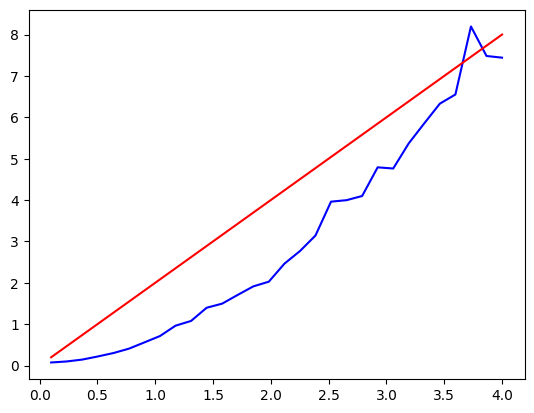

In [16]:
# Tempo medio di uscita dal cerchio di raggio $r$
def average_escape_time(radius=1, end_point=20, n_steps=300, n_trajectories=100):
    escape_times = []
    for i in range(n_trajectories):
        x, y = generate_trajectories(n_traj=2, n_timesteps=n_steps, end_time=end_point)
        for i in range(len(y[0])):
            x_i = y[0][i]
            y_i = y[1][i]
            if x_i**2 + y_i**2 >= radius**2:
                escape_times.append(x[i])
                break
    return escape_times
radii = np.linspace(0.1, 4, 30)
average_escape = []
for radius in radii:
    average_escape.append(np.array(average_escape_time(radius=radius)).mean())

fig, ax = plt.subplots(1,1)
ax.plot(radii, np.array(average_escape), c='blue')
ax.plot(radii, 2*radii, c='red')

## Esercizio 3: moto Browniano tridimensionale
**Obiettivo:** calcolare la probabilità di uscita da una sfera di raggio $r$ centrata nell'origine entro il tempo $T$ e studiarne la dipendenza da $r$.

### Simulazione di un moto Browniano tridimensionale
**Obiettivo:** simulare delle traiettorie di un moto Browniano tridimensionale e graficarle, una alla volta.

Ricordo che un moto Browniano tridimensionale $(B_t^{(3)})_t$ è del tipo $B_t^{(3)} = (X_t, Y_t, Z_t)$ dove $(X_t)_t, (Y_t)_t, (Z_t)_t$ sono moti Browniani unidimensionali indipendenti. Analogamente si può scrivere
$$
B_{t+s}^{(3)} - B_{t}^{(3)} = \begin{pmatrix} Z_1 \\ Z_2 \\ Z_3 \end{pmatrix},
$$
dove $Z_j$ sono variabili aleatorie e identicamente distribuite come $\mathcal{N}(0, s)$.

In [ ]:
# Simulazione di un moto Browniano tridimensionale

### Probabilità di uscita da una sfera di raggio $r$
**Obiettivo:** calcolare la probabilità di uscita da una sfera di raggio $r$ centrata nell'origine entro il tempo $T$ e studiarne la dipendenza da $r$.


In [ ]:
# Probabilità di uscita da una sfera di raggio $r$